# Introducción

En respuesta a la preocupación de una empresa por el crecimiento de la tasa de abandono de sus empleados, se ha realizado un análisis exhaustivo de la situación.

Este proyecto tiene como objetivo proporcionar una comprensión profunda de los factores que influyen en la rotación del personal, así como desarrollar modelos predictivos para anticiparse a posibles futuras salidas de empleados.

Al finalizar, la empresa podrá enfocar sus esfuerzos de retención de talento en los grupos de empleados más propensos a abandonar la organización.

Para llevar a cabo este proyecto, contamos con el archivo "Rotacion_empleados.csv", conjunto de datos formado por un total de 14999 observaciones, que contiene información relevante sobre los empleados, como niveles de satisfacción, evaluaciones de desempeño, número de proyectos asignados, horas de trabajo mensuales, experiencia en la empresa, accidentes laborales, promociones, departamento, nivel salarial y si el empleado ha dejado la empresa o no.

El objetivo principal es predecir si un empleado dejará la empresa (variable "left") utilizando otras variables explicativas proporcionadas en el conjunto de datos.

Se espera que al finalizar este proyecto, se proporcionen recomendaciones sólidas basadas en evidencia para mejorar las estrategias de retención de empleados de la empresa. Las conclusiones extraídas estarán respaldadas por métricas y visualizaciones que justifiquen las decisiones tomadas a lo largo del proyecto.



# Estudio descriptivo de los datos.

En este apartado vamos a familiarizarnos con la estructura que toman estos datos, así como con las diversas características de los mismos y posibles relaciones entre ellos.

Lo primero que hacemos es importar las librerías que vamos a necesitar y los datos en cuestión.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             confusion_matrix,
                             classification_report)


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Importamos métricas del módulo de scikit-learn para calcular el accuracy del modelo
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import scale

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

import pickle
from google.colab import files

import os
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from warnings import filterwarnings

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Si no conseguís descargar el fichero con el anterior comando, también lo tenéis a vuestra disposición en los **Recursos del proyecto** con el nombre `Rotacion_empleados.csv`.

In [ ]:
# Leemos el conjunto de datos
datos = pd.read_csv("/content/Rotacion_empleados.csv")

In [ ]:
# obtenemos las filas y columnas qu contiene
datos.shape

(14999, 10)

In [ ]:
# Veamos los primeros datos
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#obtenemos información sobre las variables que contiene este data set
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Significado y contenido de las variables.

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1..

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no. (0: No, 1: Sí)

Observemos que la variable con denominación "sales" no expresa adecuadamente el contenido de la variable, quizá sea más procedente denominarla `department`, que es lo que hacemos a continuación.

In [ ]:
datos.rename(columns={'sales': 'department'}, inplace=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Análisis descriptivo de los datos

Antes de iniciar la construcción de cualquier modelo de Machine Learning, es primordial realizar un análisis exploratorio que nos permita familiarizarnos con los datos y extraer las primeras conclusiones de los mismos.


In [ ]:
#Tipo de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Número de valores únicos para cada variable.
datos.agg(['nunique'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
nunique,92,65,6,215,8,2,2,2,10,3


In [ ]:
# Datos estadísticos generales
datos.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.61,0.25,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.72,0.17,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.80,1.23,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.05,49.94,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.50,1.46,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.14,0.35,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.24,0.43,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.02,0.14,0.00,0.00,0.00,0.00,1.0


Cuál es el porcentaje de empleados que pertenencen a cada uno de los departamentos de la compañía?

In [ ]:
datos.department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

Esta información la podemos observar también graficamente:

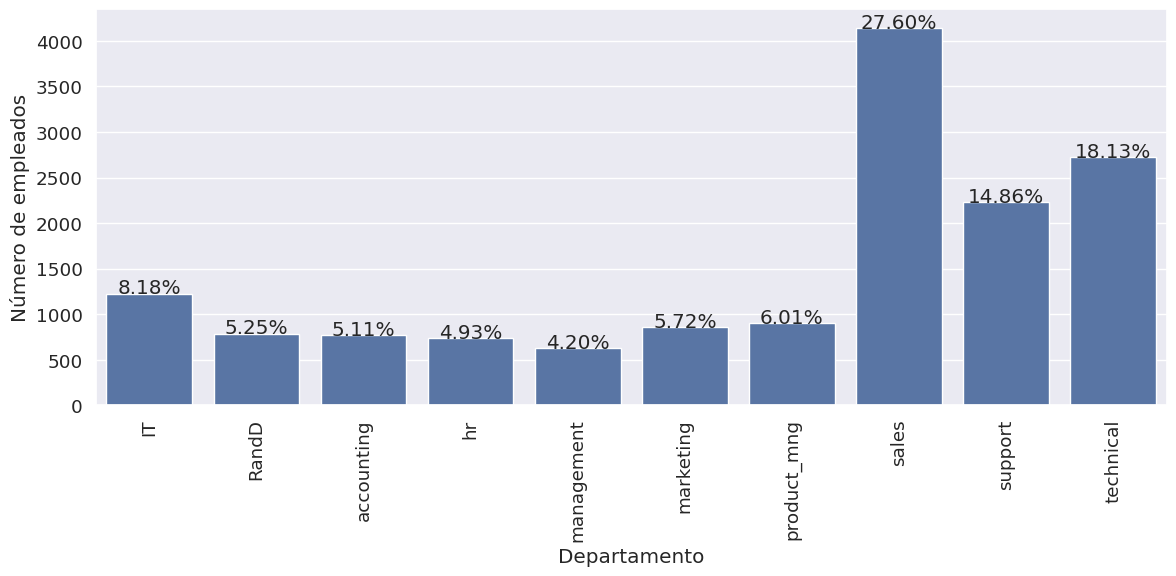

In [ ]:

plt.figure(figsize=(12, 6))

# Agrupar los datos por departamento y contar el número de empleados
data_group = datos.groupby(by=['department'], as_index=False).count()

# Crear el gráfico de barras
ax = sns.barplot(x="department", y="left", data=data_group)
ax.set(xlabel='Departamento', ylabel='Número de empleados')

# Agregar etiquetas con porcentaje
total = data_group['left'].sum()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Podemos ver que casi un 30% de los empleados presentes en la muestra pertenecen al departamento de ventas.

### Distribución de la variable objetivo


0    11428
1     3571
Name: left, dtype: int64


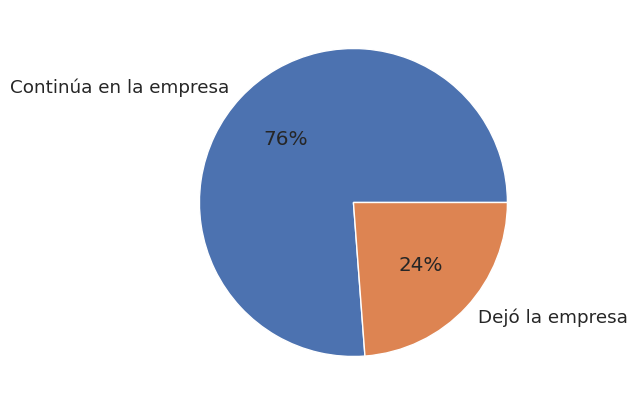

In [ ]:
#DISTRIBUCIÓN DE LA VARIABLE TARGET
a,b = datos ["left"].value_counts()
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pie([a,b],labels= ["Continúa en la empresa", "Dejó la empresa"],autopct="%1.0f%%")
print(datos["left"].value_counts())


Cuando se trata de predecir si un empleado abandonará o no la empresa, estamos ante un problema de clases desbalanceado. Esto se debe a que en la mayoría de los casos, el número de empleados que permanecen en la empresa es considerablemente mayor que el número de empleados que deciden abandonarla tal como se vé en el gráfico anterior. Bajo estas condiciones, el desbalance de clases puede afectar el rendimiento de los modelos de predicción, ya que se genera un inconveniente al entrenar los patrones de la clase con menor proporción.

### Relación entre variables

Se estudiará cómo se ditribuye la variable `left`en función de los atributos categóricos: `number_project`,`time_spend_company`,`Work_accident`,`department`, `promotion_last_5years`,`salary`.

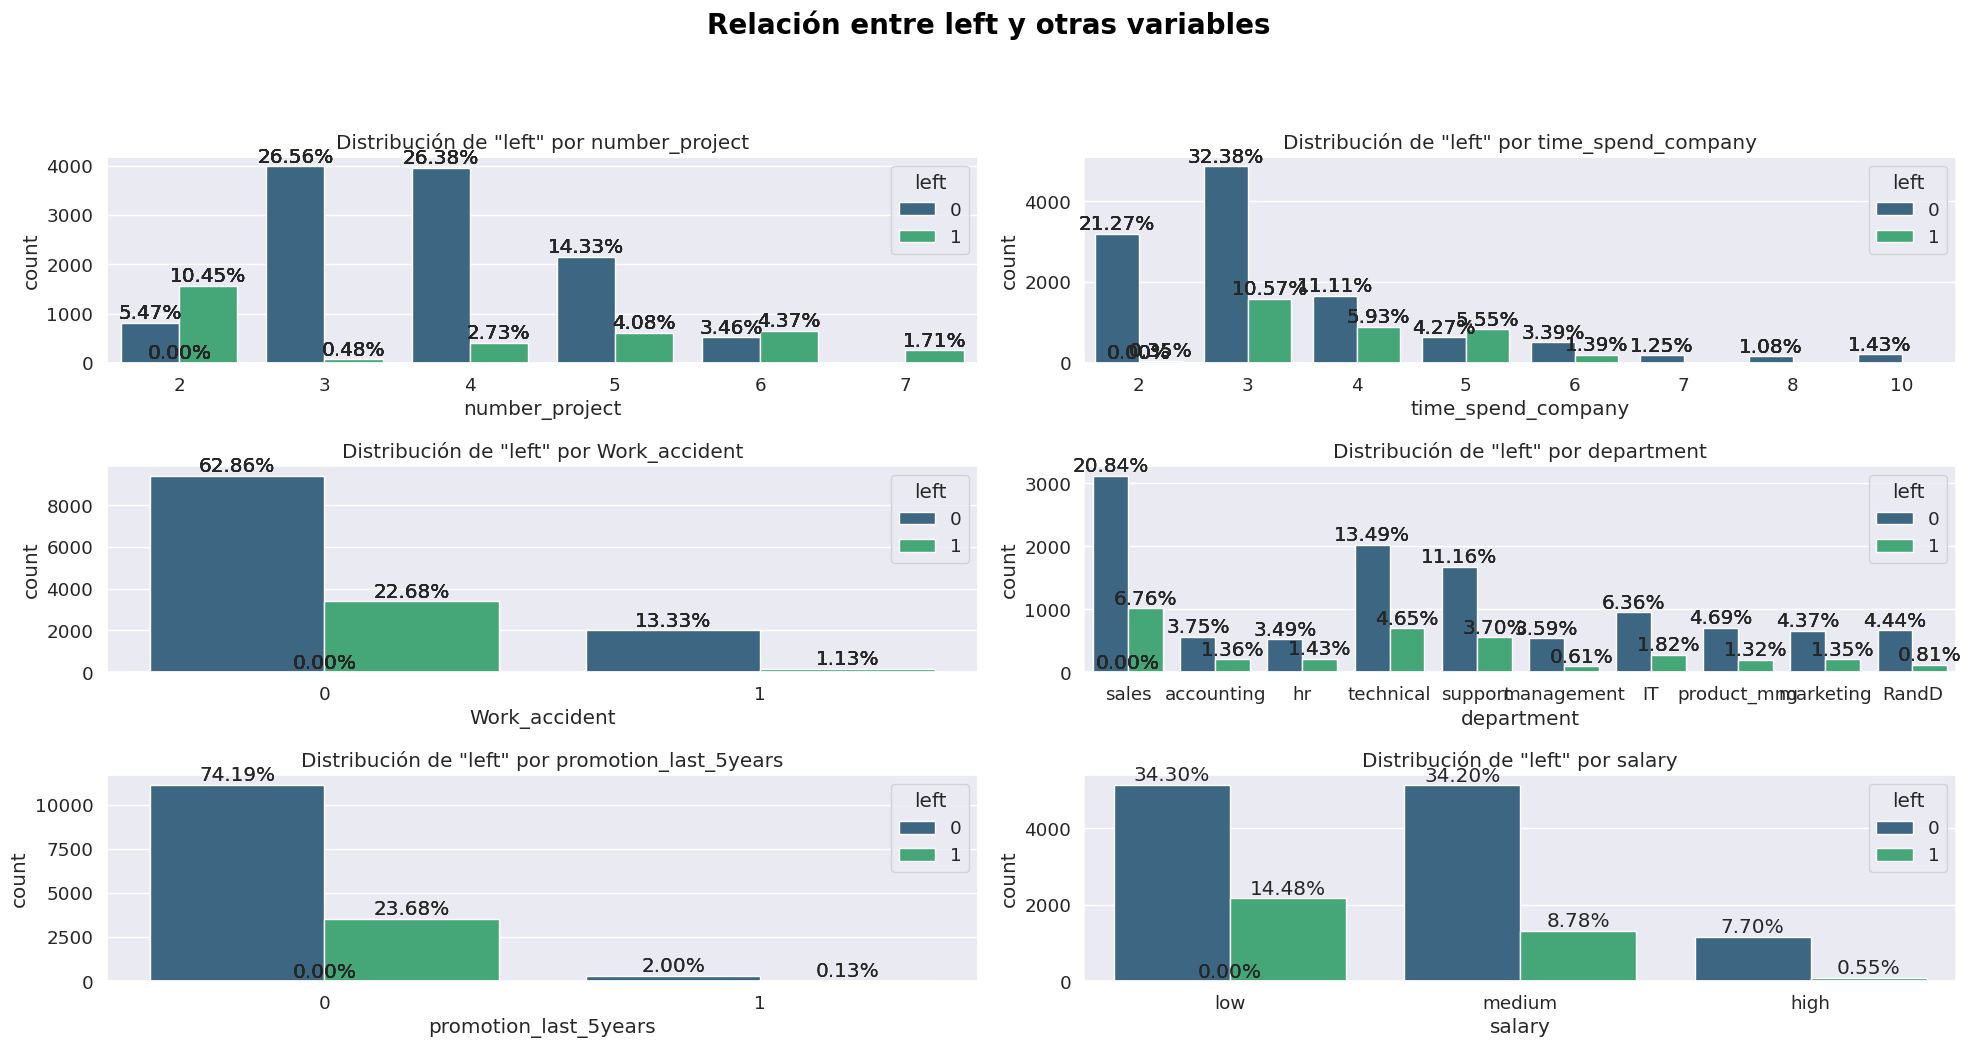

In [ ]:
# Lista de variables a analizar
variables = ['number_project', 'time_spend_company', 'Work_accident',
                         'department', 'promotion_last_5years', 'salary']

# Configurando el tamaño de la figura para los gráficos
plt.figure(figsize=(20, 10))

# Creando un gráfico para cada atributo categórico
for i, atributo in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # Configurando la posición del gráfico en una grilla de 3x2
    sns.countplot(x=atributo, hue='left', data=datos, palette='viridis')
    plt.title(f'Distribución de "left" por {atributo}')
    # Añade el título para el conjunto de gráficas.
    plt.suptitle('Relación entre left y otras variables', y=1.05, fontsize=20, fontweight='bold', color='black')

    # Añade etiquetas con porcentaje para cada barra
    total = float(len(datos)) # total de observaciones
    for ax in plt.gcf().get_axes():
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 0.5,
                    '{:.2f}%'.format((height/total)*100),
                    ha="center", va="bottom")

plt.tight_layout()
plt.show()



**Conclusiones**:

Al analizar cómo la variable objetivo "left" se distribuye con respecto a las variables en estudio, se busca identificar patrones que puedan indicar factores de riesgo para la retención de empleados. El estudio de variables como
accidentes laborales, promociones, salarios, o desempeño en departamentos específicos podrían señalar áreas donde la empresa necesita mejorar para aumentar la satisfacción y retención de los empleados.

*Number_project*:  Un alto número de proyectos puede aumentar la carga de trabajo de un empleado, lo que puede llevar a agotamiento y estrés. Si esta carga no se maneja adecuadamente, el empleado puede experimentar fatiga laboral y sentirse abrumado, lo que podría influir en su decisión de abandonar la empresa.

*Time_spend_company*:  El tiempo que pasa en la compañía puede estar relacionado con la satisfacción laboral del empleado. Como se ve en el gráfico anterior, hay menos abandono cuando el trabajador tiene más tiempo en la empresa.

*Work_accident*: Si los empleados que han tenido accidentes laborales tienden a abandonar, podría indicar problemas con la seguridad en el trabajo o la insatisfacción con el manejo durante o posterior a estos incidentes por parte de la empresa.

*Promotion_last_5years*: La falta de promociones en un período prolongado puede ser un indicador de estancamiento en la carrera profesional, lo que podría aumentar la probabilidad de que un empleado decida abandonar. Esto podría indicar la importancia de ofrecer oportunidades de crecimiento y reconocimiento para la retención de empleados.

*Salary*: El nivel salarial es un factor crucial en la satisfacción laboral. Empleados con salarios bajos pueden sentirse menos valorados y, por lo tanto, pueden estar más inclinados a abandonar en busca de mejores oportunidades.

*Department*:  Una alta tasa de abandono en departamentos específicos podría indicar problemas en la cultura, el ambiente de trabajo o en las políticas de gestión de ese departamento en particular que requiere atención.



De los gráficos anteriores, se observa que las personas que mayor tendencia tienen a abandonar la empresa tienen una antigüedad de entre 3 y 5 años. Antes y después de este periodo los abandonos disminuyen drásticamente.
En los últimos años, sólo se ha promovido al 2,13% de los trabajadores por lo que quizá la empresa no está fomentando el crecimiento de las personas dentro de la empresa por lo que terminan renunciando.
También se ve una tendencia descendente en el abandono respecto al aumento en el salario.


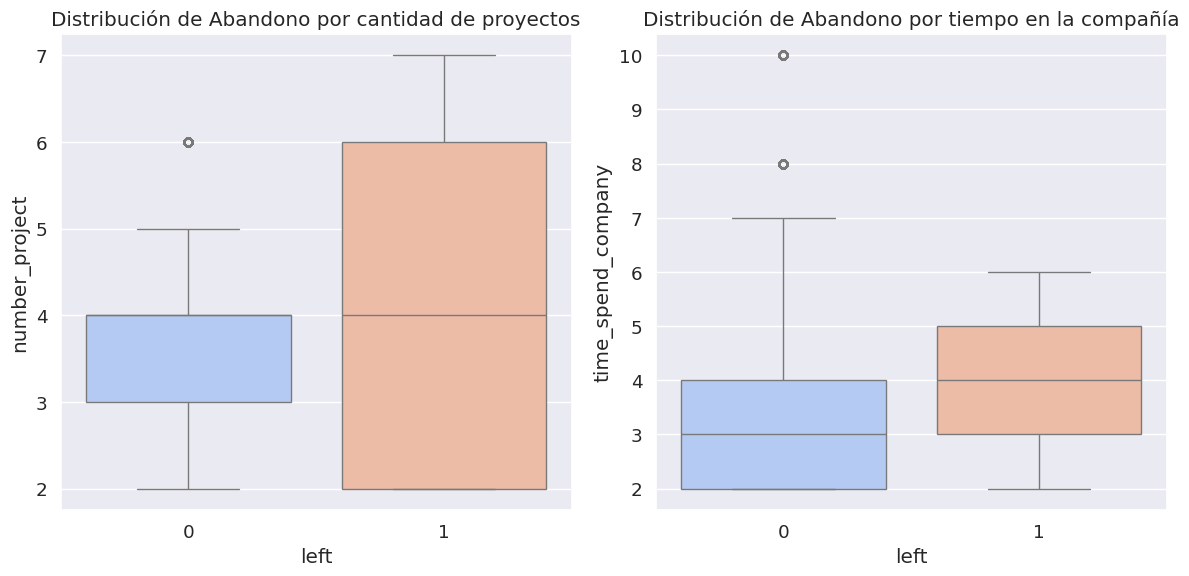

In [ ]:

# Atributos numéricos para los gráficos de caja
atributos_numericos = ['number_project', 'time_spend_company']

# Configuramos el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Gráfico de caja para 'number_project' distribuido por 'left'
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='number_project', data=datos, palette='coolwarm')
plt.title('Distribución de Abandono por cantidad de proyectos')

# Gráfico de caja para 'time_spend_company' distribuido por 'left'
plt.subplot(1, 2, 2)
sns.boxplot(x='left', y='time_spend_company', data=datos, palette='coolwarm')
plt.title('Distribución de Abandono por tiempo en la compañía')


plt.tight_layout()
plt.show()


Se observa que las personas con más de 4 proyectos tienden a dejar la empresa así también como las personas que llevan más de 4 años trabajando en la misma.

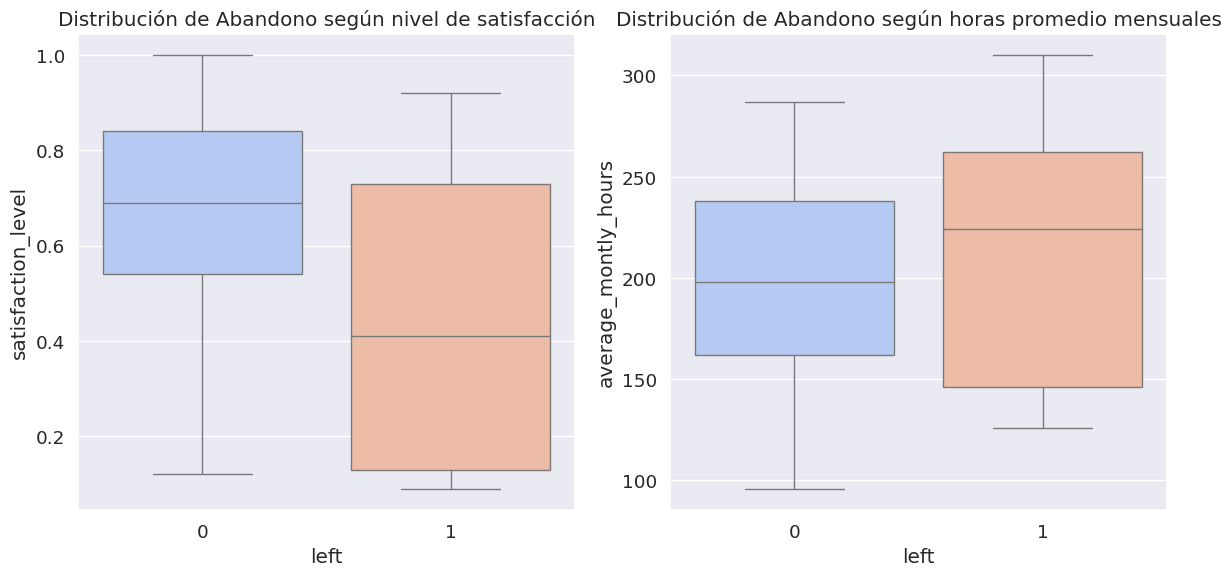

In [ ]:
# Atributos numéricos para los gráficos de caja
atributos_numericos = ['satisfaction_level', 'average_montly_hours']

# Configuramos el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Gráfico de caja para 'satisfaction_level' distribuido por 'left'
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=datos, palette='coolwarm')
plt.title('Distribución de Abandono según nivel de satisfacción')

# Gráfico de caja para 'average_montly_hours' distribuido por 'left'
plt.subplot(1, 2, 2)
sns.boxplot(x='left', y='average_montly_hours', data=datos, palette='coolwarm')
plt.title('Distribución de Abandono según horas promedio mensuales')

plt.tight_layout()
plt.show()

Tal como es de esperarse, los empleados con bajo nivel de satisfacción tienden a abandonar la empresa así como las personas que realizan más horas menusales en promedio de trabajo.

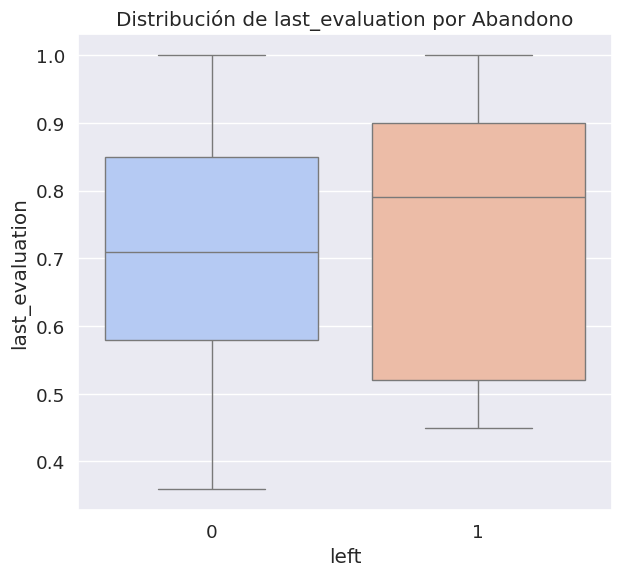

In [ ]:
# Atributos numéricos para los gráficos de caja
atributos_numericos = ['last_evaluation']

# Configuramos el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))


# Gráfico de caja para 'last_evaluation' distribuido por 'left'
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='last_evaluation', data=datos, palette='coolwarm')
plt.title('Distribución de last_evaluation por Abandono')

plt.tight_layout()
plt.show()

Las personas con mayor puntaje en la última evaluación también abandonaron la empresa.

### Correlación entre variables

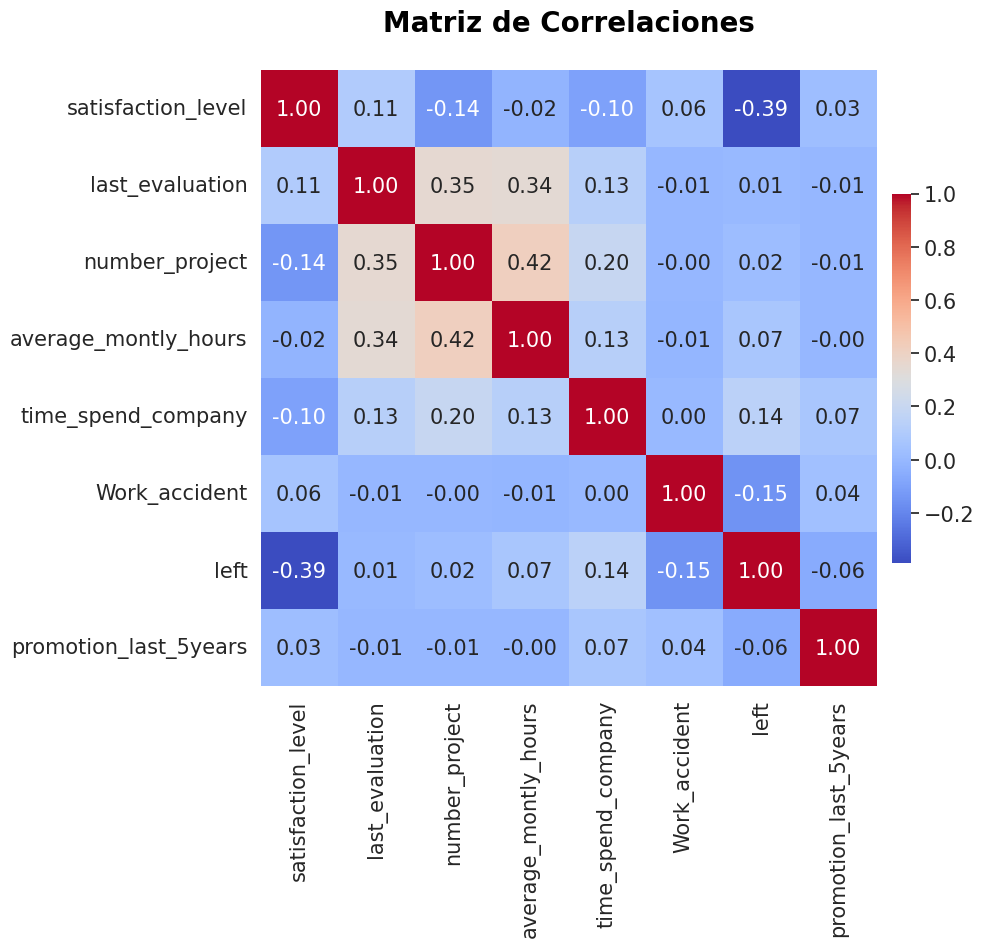

In [ ]:
# Obtenemos la matriz de correlaciones
plt.figure(figsize=(10, 8))
corr = datos.corr()

heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, fmt='.2f',
                      annot_kws={"size": 15}, cbar_kws={"shrink": .6, "pad": 0.02})

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=15)

heatmap.set_xlabel(heatmap.get_xlabel(), fontsize=15)
heatmap.set_ylabel(heatmap.get_ylabel(), fontsize=15)

heatmap.collections[0].colorbar.ax.tick_params(labelsize=15)
heatmap.set_title("Matriz de Correlaciones", y=1.05, fontsize=20, fontweight='bold', color='black')


plt.show()

De la observación de la Matriz de Confusión anterior se puede concluir que las variables que mayor correlación tienen con nuestra variable target "left" son:

1) "satisfaction level", con un valor de -0.39. El signo negativo nos indica que a menor satisfacción laboral, mayor es la posibilidad de que el trabajador deje la empresa, es decir que existe una correlación inversa entre sí.

2) "Salary", con un valor de -0.16 por lo que, de igual manera con "satisfaction level", a menor salario, mayor es la posibilidad de dejar la empresa y viceversa.

3)"work accident", también presenta una relación inversa de -0.15. Una correlación negativa entre los accidentes de trabajo y la probabilidad de renunciar al puesto puede indicar un entorno laboral seguro, una cultura de seguridad sólida y una mayor satisfacción y compromiso por parte de los empleados.

Por otra parte, se observa también cierta correlación entre las siguientes variables:

*   number_proyect y average_montly_hours. 0.42
*   last_evaluation y average_montly_hours.0.35
*   last_evaluation y number_project.0.34






## Análisis predictivo

### Preparación de los datos

Primero vamos a ver el tipo de variables con las que estamos trabajando.

In [ ]:
datos.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Podemos observar que hay algunas variables que son de tipo categórico con categorías en formato literal (`object`). Como hay algunos modelos que no admiten esta codificación de las categorías, las transformamos a formato numérico.

La variable `salary` se codificará de la siguiente manera: low = 0, medium = 1 y high = 2.


In [ ]:
#Transformar la variable salary de forma que sus categorías se codifiquen de la siguiente manera: low = 0, medium = 1 y high = 2
datos['salary'] = datos['salary'].apply(lambda x:  "0" if x =="low" else ("1" if x=="medium" else "2"))
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


Para transformar la variable "department" se utilizará el método de get_dummies() de pandas.

In [ ]:
#Transformar la variable department en variables dummies

datos = pd.get_dummies(datos, columns=["department"], drop_first=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#data['department'] = pd.to_numeric(data['department']).astype('int64')
datos['salary'] = pd.to_numeric(datos['salary']).astype('int64')

## Separación train y test

En este caso, empleamos el parámetro `stratify=y` para garantizar que la proporción de observaciones de la variable `left` se mantenga tanto en la partición de train como en la de test. Es decir, en ambas particiones conservamos aproximadamente la proporción de 24% observaciones de la categoría *Sí* y el 76% restante de la categoría *No*.

El tamaño del conjunto del **test contendrá el 20% de observaciones** sobre el conjunto total y se utilizaráel parámetro **random_state=123**.


In [ ]:
# El conjunto de entrenamiento contendrá el 80% de los datos.
from sklearn.model_selection import train_test_split
X = datos.loc[:, datos.columns !="left"]
y = datos.loc[:, datos.columns =="left"] #muestra sólo la variable Target
X_train, X_test, y_train, y_test =train_test_split(X,y,train_size = 0.8, random_state=123, stratify=y)

#Transforma los datos a formato numpy array (lo requiere el algoritmo K-NN).
X_train= np.asarray(X_train)
y_train= np.asarray(y_train)

X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

# Escalando los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implementación de los modelos

Ante un problema de clasifiación binaria (0: No abandona, 1: Sí abandona) sólo podemos aplicar un modelo de Regresión Logística o KNN.

#### Modelo 1: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Se evaluará el método KNN mediante validación cruzada (CV), empleando como métrica de evaluación el f1-score (método más indicado para los datasets con clases desbalanceadas).

In [ ]:
# Imprimimos la ayuda del método make_pipeline
make_pipeline?

In [ ]:
# Construimos un clasificador KNN
#Estandarizamos los datos para que no de más peso a una variable que a otra al calcular la distancia entre puntos
pip_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
hyperparam_range = range(3, 15, 2)

gs_knn = GridSearchCV(pip_knn,
                      param_grid={"kneighborsclassifier__n_neighbors": hyperparam_range,
                                  "kneighborsclassifier__weights": ["uniform", "distance"]},
                      scoring="f1",
                      cv=10,
                      n_jobs=-1)

gs_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': range(3, 15, 2),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='f1')

In [ ]:
print("\033[1m" + "\033[0m" + "Los mejores hiperparámetros:")
print("-" * 25)
for hyperparam in gs_knn.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_knn.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "La mejor f1-score del CV de 10 folds: {:.2f}%.".format((gs_knn.best_score_) * 100))

Los mejores hiperparámetros:
-------------------------
n_neighbors :  7
weights :  distance
La mejor f1-score del CV de 10 folds: 92.36%.


In [ ]:
# Reajustar KNN usando los mejores hiperparámetros
clf_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors = 7,
                                             weights = "distance"))


clf_knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])

In [ ]:
y_test_pred_KNN= clf_knn.predict(X_test)
y_train_pred_KNN= clf_knn.predict(X_train)

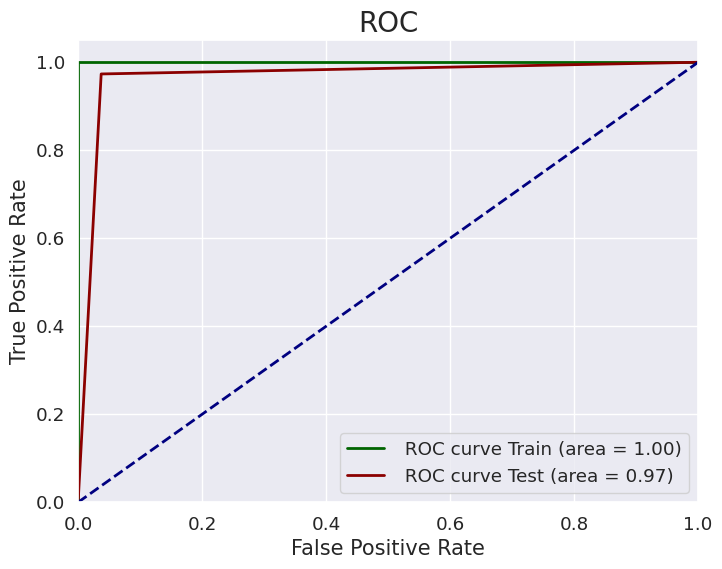

In [ ]:

  # Obtenemos la curva ROC y el AUC para el conjunto train.
  fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_KNN)
  roc_auc_train = auc(fpr_train, tpr_train)

  # Obtenemos la curva ROC y el AUC para el conjunto de test.
  fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_KNN)
  roc_auc_test = auc(fpr_test, tpr_test)

  # Mostramos ambas curvas ROC en la misma gráfica.
  plt.figure(figsize=(8, 6))
  lw = 2
  plt.plot(fpr_train, tpr_train, color="darkgreen", lw=lw, label= " ROC curve Train (area = %0.2f)" % roc_auc_train)
  plt.plot(fpr_test, tpr_test, color="darkred", lw=lw, label=" ROC curve Test (area = %0.2f)" % roc_auc_test)
  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title("ROC", fontsize=20)
  plt.legend(loc="lower right")
  plt.show()

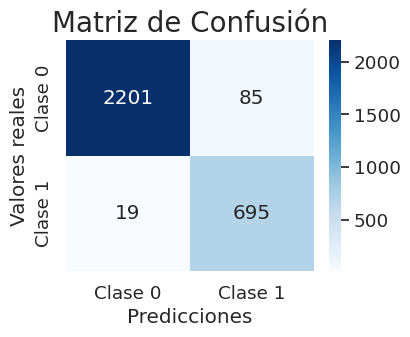

In [ ]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred_KNN)

# Define las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crea el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_test_pred_KNN)}')

El accuracy obtenido es de 0.9653333333333334


In [ ]:
print(classification_report(y_test, y_test_pred_KNN, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.99      0.96      0.98      2286
          Sí       0.89      0.97      0.93       714

    accuracy                           0.97      3000
   macro avg       0.94      0.97      0.95      3000
weighted avg       0.97      0.97      0.97      3000



Conclusión: El algoritmo demuestra una alta capacidad predictiva para los casos en los que los empleados permanecen en la empresa (99%). Sin embargo, su precisión disminuye significativamente en los casos en los que los empleados realmente abandonan la empresa (89%).
Dado que el objetivo de este proyecto es mejorar la predicción de los casos de probabilidad de abandono de la empresa se compararán los resultados obtenidos con el algoritmo de regresión logística en el siguiente paso.


#### Modelo 2: Regresión logística

In [ ]:
# Build logistic model classifier
#Estandarizamos los datos para que no de más peso a una variable que a otra al calcular la distancia entre puntos
pip_logmod = make_pipeline(StandardScaler(),
                           LogisticRegression(class_weight="balanced"))

hyperparam_range = np.arange(0.5, 20.1, 0.5)

hyperparam_grid = {"logisticregression__penalty": ["l1", "l2"],
                   "logisticregression__C":  hyperparam_range,
                   "logisticregression__fit_intercept": [True, False]
                  }

gs_logmodel = GridSearchCV(pip_logmod,
                           hyperparam_grid,
                           scoring="accuracy",
                           cv=2,
                           n_jobs=-1)

gs_logmodel.fit(X_train, y_train)

print("\033[1m" + "\033[0m" + "Los mejores hiperparámetros:")
print("-" * 25)
for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_logmodel.best_params_[hyperparam])
print("\033[1m" + "\033[94m" + "La mejor f1-score del CV de 2 folds: {:.2f}%.".format((gs_logmodel.best_score_) * 100))

Los mejores hiperparámetros:
-------------------------
C :  1.5
fit_intercept :  True
penalty :  l2
La mejor f1-score del CV de 2 folds: 75.85%.


In [ ]:
# Reajustar Regresión Logística usando los mejores hiperparámetros
clf_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(class_weight="balanced",
                                          C=1.5, penalty="l2",
                                          fit_intercept=True))


clf_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1.5, class_weight='balanced'))])

In [ ]:
y_pred= clf_lr.predict(X_test)

In [ ]:
y_test_pred_lr= clf_lr.predict(X_test)
y_train_pred_lr= clf_lr.predict(X_train)

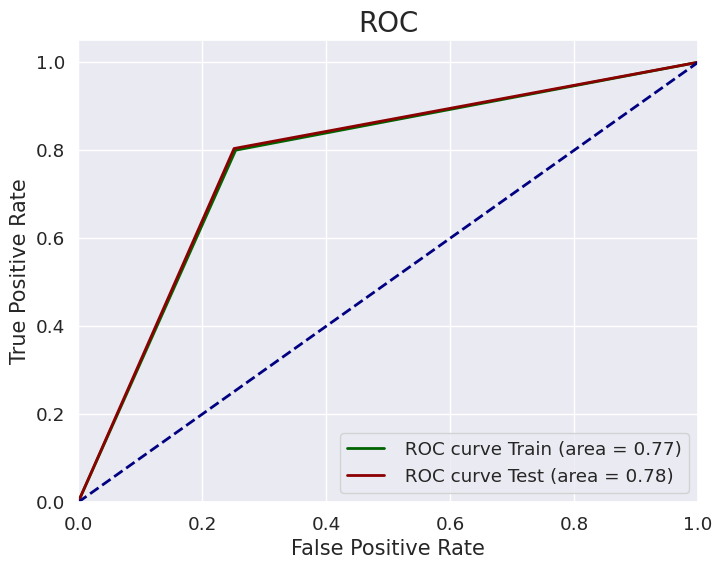

In [ ]:

  # Obtenemos la curva ROC y el AUC para el conjunto train.
  fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_lr)
  roc_auc_train = auc(fpr_train, tpr_train)

  # Obtenemos la curva ROC y el AUC para el conjunto de test.
  fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_lr)
  roc_auc_test = auc(fpr_test, tpr_test)

  # Mostramos ambas curvas ROC en la misma gráfica.
  plt.figure(figsize=(8, 6))
  lw = 2
  plt.plot(fpr_train, tpr_train, color="darkgreen", lw=lw, label= " ROC curve Train (area = %0.2f)" % roc_auc_train)
  plt.plot(fpr_test, tpr_test, color="darkred", lw=lw, label=" ROC curve Test (area = %0.2f)" % roc_auc_test)
  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.ylabel("True Positive Rate", fontsize=15)
  plt.title("ROC", fontsize=20)
  plt.legend(loc="lower right")
  plt.show()

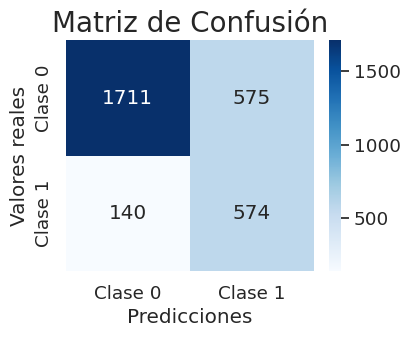

In [ ]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crea el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred)}')

El accuracy obtenido es de 0.7616666666666667


In [ ]:
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.92      0.75      0.83      2286
          Sí       0.50      0.80      0.62       714

    accuracy                           0.76      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.82      0.76      0.78      3000



Conclusión: Se observa que con el modelo de Regresión logística nuestros resultados han empobrecido ya que la precisión al predecir los trabajadores que abandonan la compañía disminuyó al 50%.

De los datos obtenidos podemos concluir que el modelo que usa el algoritmo K-NN tiene un desempeño mucho mejor que el que emplea la Regresión Logística lal como se observó en las matrices de confusión y curva ROC de ambos modelos.

Para el resto de métricas como el accuracy, f1-score, recall o precision el KNN también obtiene unos valores mejores.

### Modelo 3: Árbol de decisión con hiperparámetros por defecto

In [ ]:
# Generamos un árbol de decisión para clasificación
clf = tree.DecisionTreeClassifier(class_weight="balanced")

# El parámetro class_weight='balanced' emplea los valores de y para ajustar automáticamente los pesos de forma inversamente proporcional a la frecuencia de cada clase en el input

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento
clf = clf.fit(X_train,y_train)

In [ ]:
# Obtenemos las predicciones para el conjunto de test
y_pred = clf.predict(X_test)

In [ ]:
# ¿Cual es la profundidad del árbol entrenado?
print("La profundidad del árbol entrenado es de",clf.get_depth())


La profundidad del árbol entrenado es de 21


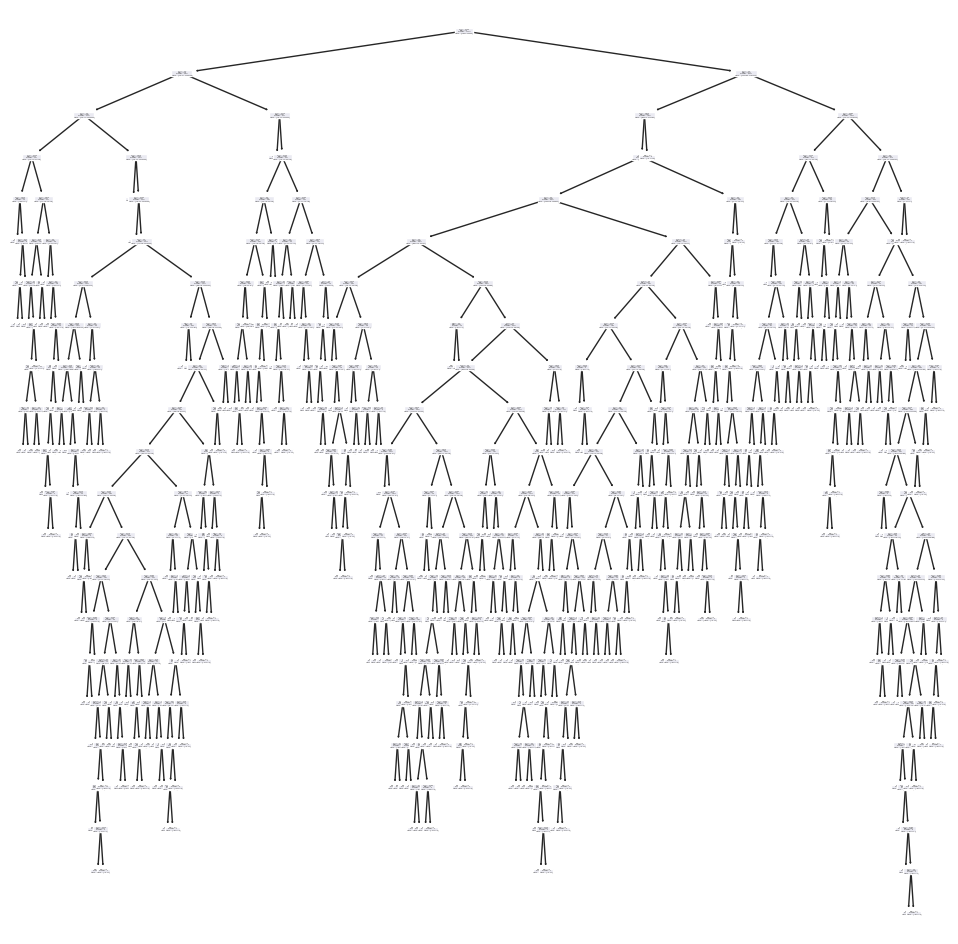

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf);


In [ ]:
# Evaluar la capacidad predictiva del modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9843333333333333


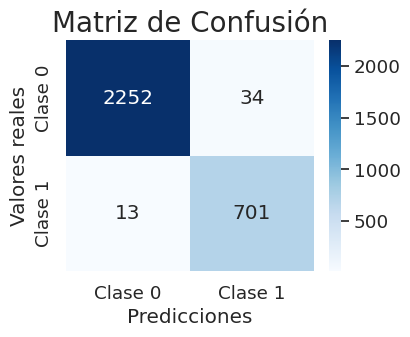

In [ ]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Define las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crea el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.95      0.98      0.97       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



### Modelo 4: Árbol de decisión modificando hiperparámetro profundidad

Como se ha visto, el modelo anterior se ha creado sin especificar ningún tipo de hiperparámetro, por lo que se han tomado los valores que por defecto posee la clase DecisionTreeClassifier(). De esa forma, ya se ha visto que el ajuste del modelo era bastante pobre y, por lo tanto, habrá que buscar otros valores de los hiperparámetros, con la finalidad de localizar mejorar las métricas anteriores como accuracy, precisión, recall, etc.

Para conseguir ese ojetivo, vamos a especificar que el árbol de decisión sólo pueda llegar al nivel 3 de profundidad como máximo, con el parámetro max_depth=3.

In [ ]:
# Creamos el objeto de clasificación
clf_depth3 = DecisionTreeClassifier(max_depth=3)

# Ajustamos el árbol
clf_depth3 = clf_depth3.fit(X_train,y_train)

#Predcimos los valores de test
y_pred_depth3 = clf_depth3.predict(X_test)

# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_depth3))

Accuracy: 0.9503333333333334


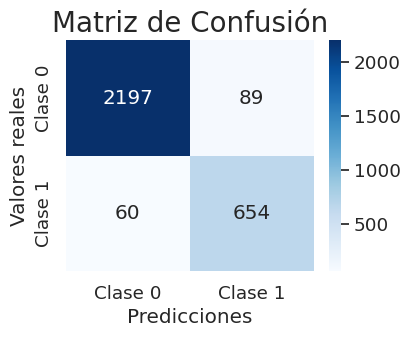

In [ ]:
# Obtenemos la matriz de confusión

conf_matrix_depth3 = confusion_matrix(y_true=y_test, y_pred=y_pred_depth3)

# Define las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crea el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_depth3, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.95      0.98      0.97       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



**Conclusión:** Vemos que al disminuir la profundidad del árbol de decisión a 3, el modelo se ha empobrecido.

### Modelo 5: Árbol de decisión modificando hiperparámetro criterio de evaluación de impurezas

Por defecto el criterio para evaluar las impurezas es Gini por lo que ahora se probará con el la Entropía que mide la aleatoriedad de la información procesada. A mayor entropía, mayor impureza y más difícil es discriminar entre clases.

In [ ]:
# Creamos el objeto de clasificación
clf_entropy = DecisionTreeClassifier(criterion="entropy")

# Ajustamos el árbol
clf_entropy = clf_entropy.fit(X_train,y_train)

#Predcimos los valores de test
y_pred_entropy = clf_entropy.predict(X_test)

# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))

Accuracy: 0.9853333333333333


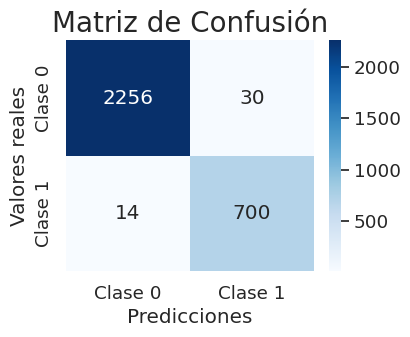

In [ ]:
# Obtenemos la matriz de confusión

conf_matrix_entropy = confusion_matrix(y_true=y_test, y_pred=y_pred_entropy)

# Define las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crea el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.98      0.97       714

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



Conclusión: Al cambiar el criterio de evaluación de las impurezas de Gini a Entropía mejoran los resultados obtenidos.


## ¿Qué modelo tiene mayor poder predictivo?

In [ ]:
# Metricas con el K-NN
print("K-NN -----------------------")
print("Accuracy:", accuracy_score(y_test, y_test_pred_KNN))
print("F1-score:", f1_score(y_test, y_test_pred_KNN))
print("Recall:", recall_score(y_test, y_test_pred_KNN))
print("Precision:", precision_score(y_test, y_test_pred_KNN))
print("")

# Metricas con Regresión Logística
print("REGRESIÓN LOGÍSTICA --------")
print("Accuracy:", accuracy_score(y_test, y_test_pred_lr))
print("F1-score:", f1_score(y_test, y_test_pred_lr))
print("Recall:", recall_score(y_test, y_test_pred_lr))
print("Precision:", precision_score(y_test, y_test_pred_lr))
print("")

# Metricas con el Árbol de decisión con Hiperparámetros por defecto
print("Árbol de decisión con Hiperparámetros por defecto -----------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("")

# Metricas con el Árbol de decisión con Profundidad=3
print("Árbol de decisión con Profundidad = 3")
print("Accuracy:", accuracy_score(y_test, y_pred_depth3))
print("F1-score:", f1_score(y_test, y_pred_depth3))
print("Recall:", recall_score(y_test, y_pred_depth3))
print("Precision:", precision_score(y_test, y_pred_depth3))
print("")

#  Metricas con el Árbol de decisión con Entropía
print("Árbol de decisión con criterio de evaluación de impurezas = Entropía")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("F1-score:", f1_score(y_test, y_pred_entropy))
print("Recall:", recall_score(y_test, y_pred_entropy))
print("Precision:", precision_score(y_test, y_pred_entropy))

K-NN -----------------------
Accuracy: 0.9653333333333334
F1-score: 0.9303882195448461
Recall: 0.9733893557422969
Precision: 0.8910256410256411

REGRESIÓN LOGÍSTICA --------
Accuracy: 0.7616666666666667
F1-score: 0.6162104133118625
Recall: 0.803921568627451
Precision: 0.4995648389904265

Árbol de decisión con Hiperparámetros por defecto -----------------------
Accuracy: 0.9843333333333333
F1-score: 0.9675638371290545
Recall: 0.9817927170868347
Precision: 0.9537414965986395

Árbol de decisión con Profundidad = 3
Accuracy: 0.9503333333333334
F1-score: 0.8977350720658889
Recall: 0.9159663865546218
Precision: 0.8802153432032301

Árbol de decisión con criterio de evaluación de impurezas = Entropía
Accuracy: 0.9853333333333333
F1-score: 0.9695290858725761
Recall: 0.9803921568627451
Precision: 0.958904109589041


**Conclusión**: Luego de analizar las métricas de las distintas variantes de los modelos estudiados, se observa que se obtienen los mejores resultados con el **Modelo 3:** **Árbol de decisión con los parámetros definidos por defecto**.


A partir de esta conclusión, se representará el árbol de decisión grafica y literalmente y se aplicarán modelos de Ensemble para seguir mejorando las predicciones.

# Representación del árbol de decisión

Como el árbol es demasiado profundo, se empleará para este apartado uno más simple, limitando la profundidad, para que la representación y análisis sea legible y entendible.

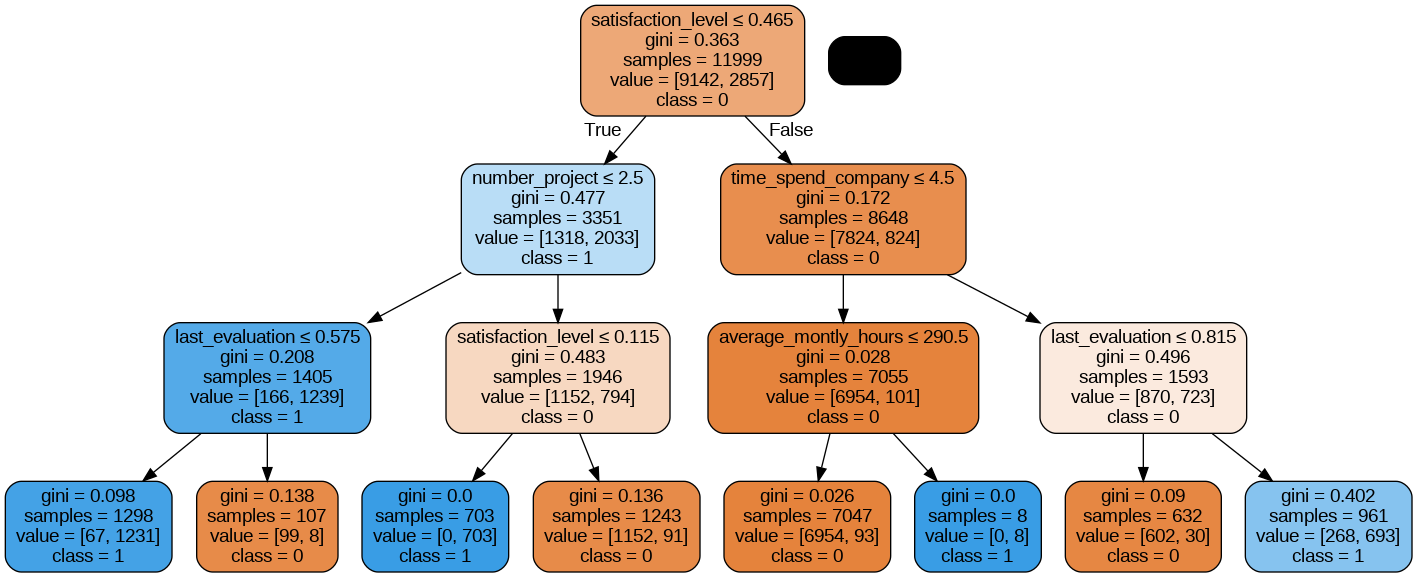

In [ ]:
values=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical']
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_depth3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = values,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('left.png')
Image(graph.create_png())

Se elige la variable Satisfaction_level como primer criterio de particionado.

Samples: Indica el número de muestras en el conjunto de datos que llegan a este nodo.En este caso, el nodo principal tiene 11999 muestras.

Gini: Es una medida de impureza utilizada para evaluar la calidad de la división en el nodo. Un valor más bajo indica una mayor pureza. Cuando Gini=0.0 significa que es un nodo totalmente puro. No se ramifica más porque todas las instancias son de la misma clase. De lo contrario, si hay impurezas se sigue ramificando.

Value: Es una lista que muestra la distribución de clases en el nodo. Por ejemplo, [9142,2857] significa que hay 9142 muestras de la clase "0" y 2857 muestras de la clase "1".

Class: Indica la clase mayoritaria en el nodo. Es la clase a la que se asignarán las nuevas muestras que lleguen a este nodo en el proceso de clasificación.En este ejemplo class puede tomar el valor 0 o 1 dependiendo si permanece en la empresa o se va de la misma respectivamente.

## Reglas árbol de decisión en formato literal

In [ ]:
from sklearn.tree import export_text
r = export_text(clf_depth3, feature_names=list(values))
print(r)

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- class: 1
|   |   |--- last_evaluation >  0.57
|   |   |   |--- class: 0
|   |--- number_project >  2.50
|   |   |--- satisfaction_level <= 0.11
|   |   |   |--- class: 1
|   |   |--- satisfaction_level >  0.11
|   |   |   |--- class: 0
|--- satisfaction_level >  0.47
|   |--- time_spend_company <= 4.50
|   |   |--- average_montly_hours <= 290.50
|   |   |   |--- class: 0
|   |   |--- average_montly_hours >  290.50
|   |   |   |--- class: 1
|   |--- time_spend_company >  4.50
|   |   |--- last_evaluation <= 0.81
|   |   |   |--- class: 0
|   |   |--- last_evaluation >  0.81
|   |   |   |--- class: 1



Este formato literal nos permite ver en mayor detalle cada uno de los puntos de corte y reglas creadas por el árbol.

Una regla bastante facil de identificar en este formato para predecir la clase 1 (personas que abandonan la empresa) es la siguiente:

satisfation_level < 0.47 ▶ number_project > 2.5 ▶ satisfaction_level < 0.11
Estas personas están poco satisfechas con su trabajo o la compañía (< 0.11). number_project > 2.5 no nos brinda mucha información sobre la carga de trabajo pero con ayuda del análisis descriptivo vemos que estos trabajadores tienen una cantidad elevada de proyectos.

Es sorprendente ver también que personas que tienen un nivel de satisfacción alto (satisfation_level > 0.47), que llevan bastante tiempo en la empresa > 4.5 y que obtuvieron calificación alta en la última evaluación last_evaluation > 0.81 tienen mayor tendencia a dejar la empresa.

## Modelo 6: Ensemble de tipo Bagging (Hiperparámetros I)

Utilizamos para este clasificador Bagging los siguientes hiperparámetros:

n_estimators = 100


In [ ]:
# Instanciamos el modelo con los hiperparámetros más adecuados
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
start_clf = time.time()

In [ ]:
# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
end_clf = time.time()

In [ ]:
# Obtenemos las predicciones para el conjunto de test
y_pred_clf=clf.predict(X_test)

In [ ]:
# Evaluar la capacidad predictiva del modelo

print("Classification report del modelo Bagging 1:")
print(classification_report(y_test,y_pred_clf))

Classification report del modelo Bagging 1:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



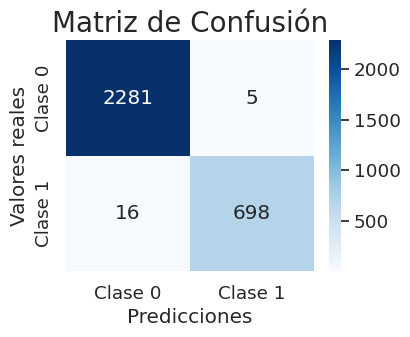

In [ ]:
# Calcular la matriz de confusión
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf)

# Definir las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crear el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_clf, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
# Calcular la precisión del modelo de Test

print("---- Métricas Bagging Hiperparámetros 1 ----")

print("Tiempo empleado: ",end_clf - start_clf, "segundos")
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print("F1-score:", f1_score(y_test, y_pred_clf))
print("Recall:", recall_score(y_test, y_pred_clf))
print("Precision:", precision_score(y_test, y_pred_clf))

---- Métricas Bagging Hiperparámetros 1 ----
Tiempo empleado:  0.9608325958251953 segundos
Accuracy: 0.993
F1-score: 0.9851799576570218
Recall: 0.9775910364145658
Precision: 0.9928876244665719


## Modelo 7: Ensemble de tipo Bagging (Hiperparámetros II)

Utilizamos GridSearch CV para encontrar los mejores hiperparámetros para este clasificador Bagging.

In [ ]:
start_bg_GS = time.time()
print("Comenzamos el Grid Search")

# Definir los parámetros a ajustar
param_grid = {
    'base_estimator__max_depth': [None, 5, 10],  # Profundidad máxima del árbol base
    'n_estimators': [10, 50, 100],  # Número de árboles en el ensemble
    'max_samples': [0.5, 0.7, 1.0],  # Proporción de muestras para entrenar cada árbol
}

# Definir el clasificador base (árbol de decisión)
base_classifier = DecisionTreeClassifier()

# Definir el modelo de Bagging
bagging_classifier = BaggingClassifier(base_classifier, random_state=42)

# Crear el objeto GridSearchCV
grid_search_bg_GS = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros
grid_search_bg_GS.fit(X_train, y_train)

end_bg_GS = time.time()


# Obtener el mejor modelo
best_model = grid_search_bg_GS.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_test_pred_bg_GS = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred_bg_GS)

Comenzamos el Grid Search


In [ ]:
print("Precisión del mejor modelo:", accuracy)
print("Tiempo empleado: ",end_bg_GS - start_bg_GS, "segundos")
print("Mejores hiperparámetros:",grid_search_bg_GS.best_params_)
print("Train Score:",grid_search_bg_GS.best_score_)
print("Test Score:",grid_search_bg_GS.score(X_test,y_test_pred_bg_GS))

Precisión del mejor modelo: 0.9923333333333333
Tiempo empleado:  118.2569842338562 segundos
Mejores hiperparámetros: {'base_estimator__max_depth': None, 'max_samples': 1.0, 'n_estimators': 100}
Train Score: 0.9882489578991246
Test Score: 1.0


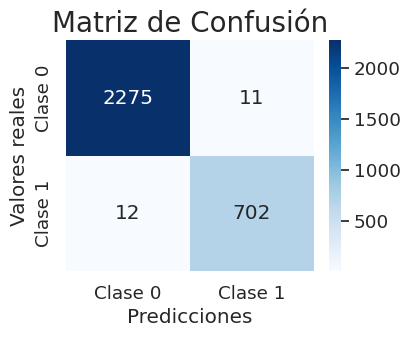

In [ ]:
# Calcular la matriz de confusión
conf_matrix_bg_GS = confusion_matrix(y_test, y_test_pred_bg_GS)

# Definir las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crear el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_bg_GS, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

La matriz de confusión nos ratifica que los valores han mejorado mucho con los hiperparámetros obtenidos con GridSearch

In [ ]:
# Calcular la precisión del modelo de Test

print("---- Métricas Bagging Hiperparámetros 2 ----")

print("Accuracy:", accuracy_score(y_test, y_test_pred_bg_GS))
print("F1-score:", f1_score(y_test, y_test_pred_bg_GS))
print("Recall:", recall_score(y_test, y_test_pred_bg_GS))
print("Precision:", precision_score(y_test, y_test_pred_bg_GS))

---- Métricas Bagging Hiperparámetros 2 ----
Accuracy: 0.9923333333333333
F1-score: 0.9838822704975473
Recall: 0.9831932773109243
Precision: 0.9845722300140253


## Modelo 8: Ensemble de tipo Boosting (Hiperparámetros I)

Combinación de hiperparámetros 1

Utilizamos para este clasificador Boosting los siguientes hiperparámetros:

n_estimators = 500

learning_rate=0.05

max_features = 5

In [ ]:
# Definimos el modelo
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

start_gbc = time.time()

# Ajustamos a los datos (entrenamiento)
gbc.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
end_gbc = time.time()

In [ ]:
# Obtenemos las predicciones para el conjunto de test
y_test_pred_gbc =gbc.predict(X_test)
y_train_pred_gbc = gbc.predict(X_train)

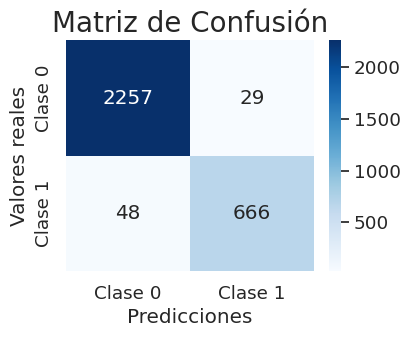

In [ ]:
# Calcular la matriz de confusión
conf_matrix_gbc = confusion_matrix(y_test, y_test_pred_gbc)

# Definir las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crear el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
# Calcular la precisión del modelo de Test

print("---- Métricas Boosting Hiperparámetros 1 ----")

print("Accuracy:", accuracy_score(y_test, y_test_pred_gbc))
print("F1-score:", f1_score(y_test, y_test_pred_gbc))
print("Recall:", recall_score(y_test, y_test_pred_gbc))
print("Precision:", precision_score(y_test, y_test_pred_gbc))

---- Métricas Boosting Hiperparámetros 1 ----
Accuracy: 0.9743333333333334
F1-score: 0.9453513129879347
Recall: 0.9327731092436975
Precision: 0.958273381294964


## Modelo 9: Ensemble de tipo Boosting (Hiperparámetros II)

Podemos observar que las métricas anteriores son muy buenas. De todas maneras, intentaremos buscar otros hiperparámetros que mejoren estos resultados. Lo hacemos apoyándonos en GridSearchCV(), de la siguiente manera.

In [ ]:
start_gbc_GS = time.time()
print("Comenzamos el Grid Search")
# Definimos los parámetros que queremos probar
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,7]
}


gbc = GradientBoostingClassifier(n_estimators= 400, random_state=10)
gbc_GS = GridSearchCV(gbc, grid, cv = 4)
gbc_GS.fit(X_train,y_train)
end_gbc_GS = time.time()


Comenzamos el Grid Search


In [ ]:
# Obtener el mejor modelo
best_model = gbc_GS.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_test_pred_gbc_GS = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred_gbc_GS)


In [ ]:
print("Tiempo empleado: ",end_gbc_GS - start_gbc_GS, "segundos")
print("Mejores parámetros:",gbc_GS.best_params_)
print("Train Score:",gbc_GS.best_score_)
print("Test Score:",gbc_GS.score(X_test,y_test))

Tiempo empleado:  240.30146050453186 segundos
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 7}
Train Score: 0.988748888518395
Test Score: 0.9913333333333333


En los casos de la búsqueda por Grid Search, podemos apreciar que el entrenamiento de GradientBoostingClassifier() emplea demasiado tiempo por lo que intentaremos con el HistGradientBoostingClassifier para ver si se obtienen mejores resultados en un periodo más corto de tiempo.

## Modelo 10: HistGradientBoostingClassifier

In [ ]:
# Definimos Gradient Boosting Classifier con algunos hiperparámetros
hgbc=HistGradientBoostingClassifier(learning_rate=0.05,random_state=100)

# Ajustamos los datos

hgbc.fit(X_train,y_train)

HistGradientBoostingClassifier(learning_rate=0.05, random_state=100)

In [ ]:
# Obtenemos las predicciones para el conjunto de test
y_test_pred_hgbc =hgbc.predict(X_test)
y_train_pred_hgbc = hgbc.predict(X_train)

Una vez entrenado el modelo, validamos los resultados obtenidos contra el conjunto de test

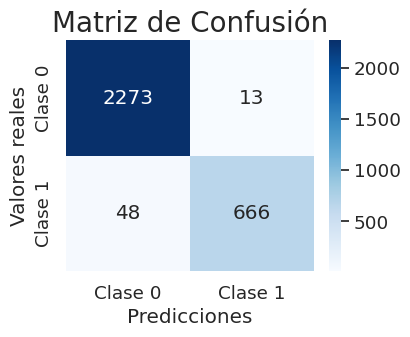

In [ ]:
# Calcular la matriz de confusión
conf_matrix_hgbc = confusion_matrix(y_test, y_test_pred_hgbc)

# Definir las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crear el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_hgbc, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

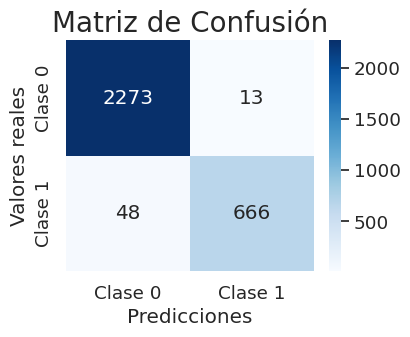

In [ ]:
# Calcular la matriz de confusión
conf_matrix_hgbc = confusion_matrix(y_test, y_test_pred_hgbc)

# Definir las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crear el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_hgbc, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()

In [ ]:
# ¡¡¡¡La ejecuación de esto tarda bastante tiempo !!!!
start_hgbc_GS = time.time()
print("Comenzamos el Grid Search")
# Definimos los parámetros que queremos probar
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,7]
}


hgbc = HistGradientBoostingClassifier(random_state=100)
hgbc_GS = GridSearchCV(hgbc, grid, cv = 4)
hgbc_GS.fit(X_train,y_train)
end_hgbc_GS = time.time()


Comenzamos el Grid Search


In [ ]:
print("Tiempo empleado: ",end_hgbc_GS - start_hgbc_GS, "segundos")
print("Mejores parámetros:",hgbc_GS.best_params_)
print("Train Score:",hgbc_GS.best_score_)
print("Test Score:",hgbc_GS.score(X_test,y_test))

Tiempo empleado:  15.448011875152588 segundos
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7}
Train Score: 0.9814149160831387
Test Score: 0.982


Se observa que con el HistGradientBoostingClassifier no sólo se obtienen muy buenos resultados sino que el tiempo empleado es muchisimo menor (288 segundos contra 16 segundos)

#¿Qué modelo tiene mayor poder predictivo?

Comparar los diferentes árboles entrenados empleando las métricas más adecuadas para un problema desblanaceado como el nuestro.

In [ ]:
# Metricas con Modelo Tipo Bagging con Hiperparámetros 1
print("---- Modelo Tipo Bagging con Hiperparámetros 1 ----")
print("Tiempo empleado: ",end_clf - start_clf, "segundos")
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print("F1-score:", f1_score(y_test, y_pred_clf))
print("Recall:", recall_score(y_test, y_pred_clf))
print("Precision:", precision_score(y_test,y_pred_clf))
print("")

# Metricas con Modelo Tipo Bagging con Hiperparámetros 2
print("---- Modelo Tipo Bagging con Hiperparámetros 2 ----")
print("Tiempo empleado: ",end_bg_GS - start_bg_GS, "segundos")
print("Accuracy:", accuracy_score(y_test, y_test_pred_bg_GS))
print("F1-score:", f1_score(y_test, y_test_pred_bg_GS))
print("Recall:", recall_score(y_test, y_test_pred_bg_GS))
print("Precision:", precision_score(y_test, y_test_pred_bg_GS))
print("")

# Metricas con Modelo Tipo Boosting con Hiperparámetros 1
print("---- Modelo Tipo Boosting con Hiperparámetros 1 ----")
print("Tiempo empleado: ",end_gbc - start_gbc, "segundos")
print("Accuracy:", accuracy_score(y_test, y_test_pred_gbc))
print("F1-score:", f1_score(y_test, y_test_pred_gbc))
print("Recall:", recall_score(y_test, y_test_pred_gbc))
print("Precision:", precision_score(y_test, y_test_pred_gbc))
print("")

# Metricas con Modelo Tipo Boosting con Hiperparámetros 2
print("---- Modelo Tipo Boosting con Hiperparámetros 2 ----")
print("Tiempo empleado: ",end_gbc_GS - start_gbc_GS, "segundos")
print("Accuracy:", accuracy_score(y_test, y_test_pred_gbc_GS))
print("F1-score:", f1_score(y_test, y_test_pred_gbc_GS))
print("Recall:", recall_score(y_test, y_test_pred_gbc_GS))
print("Precision:", precision_score(y_test, y_test_pred_gbc_GS))
print("")

# Metricas con Modelo HistGradientBoostingClassifier
print("---- Modelo HistGradientBoostingClassifier ----")
print("Tiempo empleado: ",end_hgbc_GS - start_hgbc_GS, "segundos")
print("Accuracy:", accuracy_score(y_test, y_test_pred_hgbc))
print("F1-score:", f1_score(y_test, y_test_pred_hgbc))
print("Recall:", recall_score(y_test, y_test_pred_hgbc))
print("Precision:", precision_score(y_test, y_test_pred_hgbc))

---- Modelo Tipo Bagging con Hiperparámetros 1 ----
Tiempo empleado:  0.9608325958251953 segundos
Accuracy: 0.993
F1-score: 0.9851799576570218
Recall: 0.9775910364145658
Precision: 0.9928876244665719

---- Modelo Tipo Bagging con Hiperparámetros 2 ----
Tiempo empleado:  118.2569842338562 segundos
Accuracy: 0.9923333333333333
F1-score: 0.9838822704975473
Recall: 0.9831932773109243
Precision: 0.9845722300140253

---- Modelo Tipo Boosting con Hiperparámetros 1 ----
Tiempo empleado:  2.8616771697998047 segundos
Accuracy: 0.9743333333333334
F1-score: 0.9453513129879347
Recall: 0.9327731092436975
Precision: 0.958273381294964

---- Modelo Tipo Boosting con Hiperparámetros 2 ----
Tiempo empleado:  240.30146050453186 segundos
Accuracy: 0.9913333333333333
F1-score: 0.9818181818181818
Recall: 0.9831932773109243
Precision: 0.9804469273743017

---- Modelo HistGradientBoostingClassifier ----
Tiempo empleado:  15.448011875152588 segundos
Accuracy: 0.9796666666666667
F1-score: 0.9562096195262025
Recal

Para determinar cuál es el mejor modelo de predicción, es importante considerar varias métricas de rendimiento, como la exactitud (accuracy), F1-score, recall y precisión. Además, también es relevante tener en cuenta el tiempo de ejecución, ya que un modelo con un rendimiento ligeramente inferior pero con un tiempo de ejecución significativamente menor puede ser preferible en ciertos casos.
En resumen, la elección del mejor modelo va a depender de las necesidades específicas del proyecto. En este caso, considerando tanto el rendimiento como el tiempo de ejecución, el Modelo Tipo Bagging con Hiperparámetros 1 (RandomForest) parece ser el mejor, ya que tiene la mejor exactitud y F1-score, además de un buen tiempo de ejecución.

# Importancia de las variables para el modelo

A continuación se evaluarán las variables más importantes para el mejor modelo elegido.

In [ ]:
# Volvemos a entrenar el clasificador RF
clf_rf = RandomForestClassifier(n_estimators=500,
                                criterion = "entropy",
                                max_features = 0.5,
                                min_samples_leaf = 1,
                                class_weight="balanced",
                                random_state=123)

# normalización de los atributos
clf_rf.fit(StandardScaler().fit_transform(X_train), y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=0.5, n_estimators=500, random_state=123)

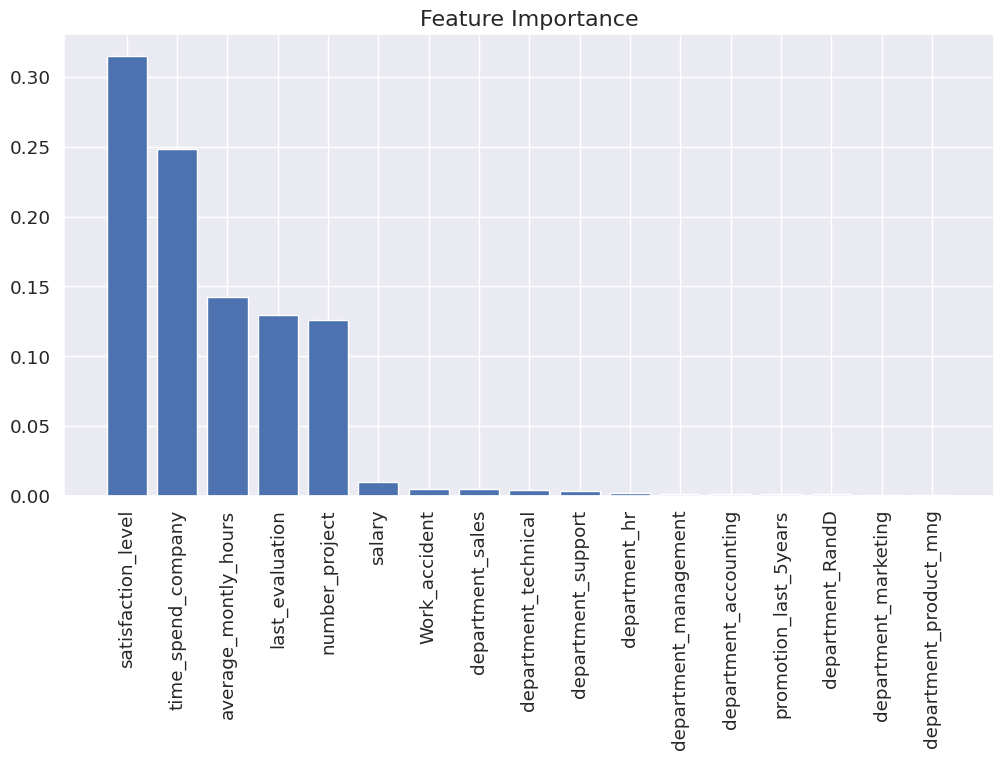

In [ ]:
# Plot features importance
importances = clf_rf.feature_importances_
indices = np.argsort(clf_rf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 18), importances[indices], align="center")
plt.xticks(range(1, 18), datos.columns[datos.columns != "left"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

Según el gráfico de barras precedente, las variables más relevantes son:

satisfaction_level

time_spend_company

average_montly_hours

last_evaluation

number_project

Contrariamente a lo que se podría pensar, la variable salario no ha sido considerada relevante por nuestro modelo para determinar si un empleado abandona la empresa. Esto nos puede indicar que en la actualidad los trabajadores valoran otros aspectos por sobre el salario en sí. Esto le da un indicio a la empresa de que debe hacer hincapié en aspectos más relacionados con el clima laboral y la carga del trabajo.
El resto de variables no tienen practicamente influencia por lo que se podrían eliminar.

A continuación vamos a verificar esta información obteniendo un modelo con Random Forest empleando los mismos valores de los hiperparámetros que los correspondientes al mejor modelo pero considerando solo las variables más importantes que fueron nombradas recién.

In [ ]:
# Conjunto de datos considerando solo las variables importantes
X = datos[['satisfaction_level', 'time_spend_company', 'number_project', 'average_montly_hours', 'last_evaluation']]
y = datos['left']

In [ ]:
# Prepara los dataset de entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 123, stratify=y)

In [ ]:
# Instancia el modelo con los hiperparámetros del mejor modelo
clf_bestmodel=RandomForestClassifier(n_estimators=100)

In [ ]:
start_bestmodel=time.time()

In [ ]:
# Entrena el modelo con los datos de entrenamiento
clf_bestmodel = clf_bestmodel.fit(X_train,y_train)

In [ ]:
end_bestmodel=time.time()

In [ ]:
# Obtiene las predicciones para el conjunto de test
y_pred=clf_bestmodel.predict(X_test)

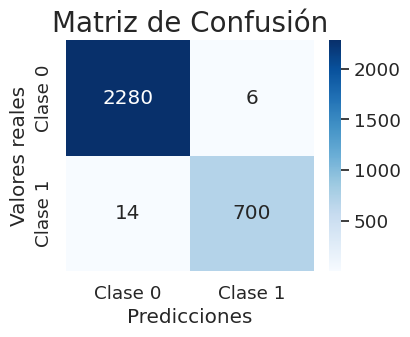

---- Mejor Modelo:Random Forest ----
Tiempo empleado:  0.9972302913665771 segundos
Accuracy: 0.9933333333333333
F1-score: 0.9859154929577464
Recall: 0.9803921568627451
Precision: 0.9915014164305949


In [ ]:
# Evalua la capacidad predictiva del modelo en el conjunto de test.
# Calcular la matriz de confusión
conf_matrix_clf_bestmodel = confusion_matrix(y_test, y_pred)

# Definir las etiquetas de las clases
labels = ['Clase 0', 'Clase 1']

# Crear el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente
sns.heatmap(conf_matrix_clf_bestmodel, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión',fontsize=20)
plt.show()
# Metricas con Mejor Modelo:Random Forest
print("---- Mejor Modelo:Random Forest ----")
print("Tiempo empleado: ",end_bestmodel - start_bestmodel, "segundos")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test,y_pred))


Se observa que el resultado es practicamente idéntico al obtenido al tener en cuenta todas las variables, por lo que podemos confirmar que se pueden ignorar el resto de variables y concentrarse en las 5 variables más importantes nombradas anteriormente.

# Conclusión Final

Durante el desarrollo de este proyecto, hemos llevado a cabo un análisis detallado sobre la tasa de abandono de empleados en una empresa, con el objetivo de comprender mejor los factores que influyen en esta métrica y desarrollar modelos predictivos para anticipar futuras salidas de empleados.

A lo largo de las diferentes fases del proyecto, hemos realizado un exhaustivo análisis exploratorio de datos, preprocesamiento de datos, entrenamiento y evaluación de modelos predictivos. Hemos identificado las variables más relevantes que influyen en la decisión de un empleado de abandonar la empresa, tales como el nivel de satisfacción, el tiempo pasado en la empresa, el número de proyectos asignados, las horas trabajadas mensualmente y la última evaluación de desempeño.

Durante la evaluación de modelos, nos enfrentamos al desafío de lidiar con un problema de clases desbalanceado, donde el número de empleados que permanecen en la empresa es considerablemente mayor que el número de empleados que deciden abandonarla. Sin embargo, hemos utilizado técnicas de remuestreo y selección de modelos adecuados para abordar este problema y obtener resultados significativos.

Al considerar diferentes métricas de rendimiento, como la exactitud, F1-score, recall y precisión, así como el tiempo de ejecución de los modelos, hemos identificado el Modelo de RandomForest como el más adecuado para nuestras necesidades, ya que presenta un buen equilibrio entre precisión y tiempo de ejecución.

Además, hemos demostrado que podemos lograr resultados prácticamente idénticos al utilizar solo las variables más importantes, lo que sugiere que la empresa puede concentrarse en aspectos específicos, como el nivel de satisfacción y la carga de trabajo, para mejorar la retención de empleados.

En resumen, este proyecto proporciona valiosas ideas y recomendaciones para la empresa, permitiéndole enfocar sus esfuerzos de retención de talento en áreas clave que influyen en la decisión de los empleados de quedarse o abandonar la organización. Las conclusiones obtenidas están respaldadas por análisis detallados y métricas de rendimiento, lo que garantiza la validez y relevancia de nuestras recomendaciones.